# 测试每个中心度中的结果

# 测试最中心度的划分是否正确

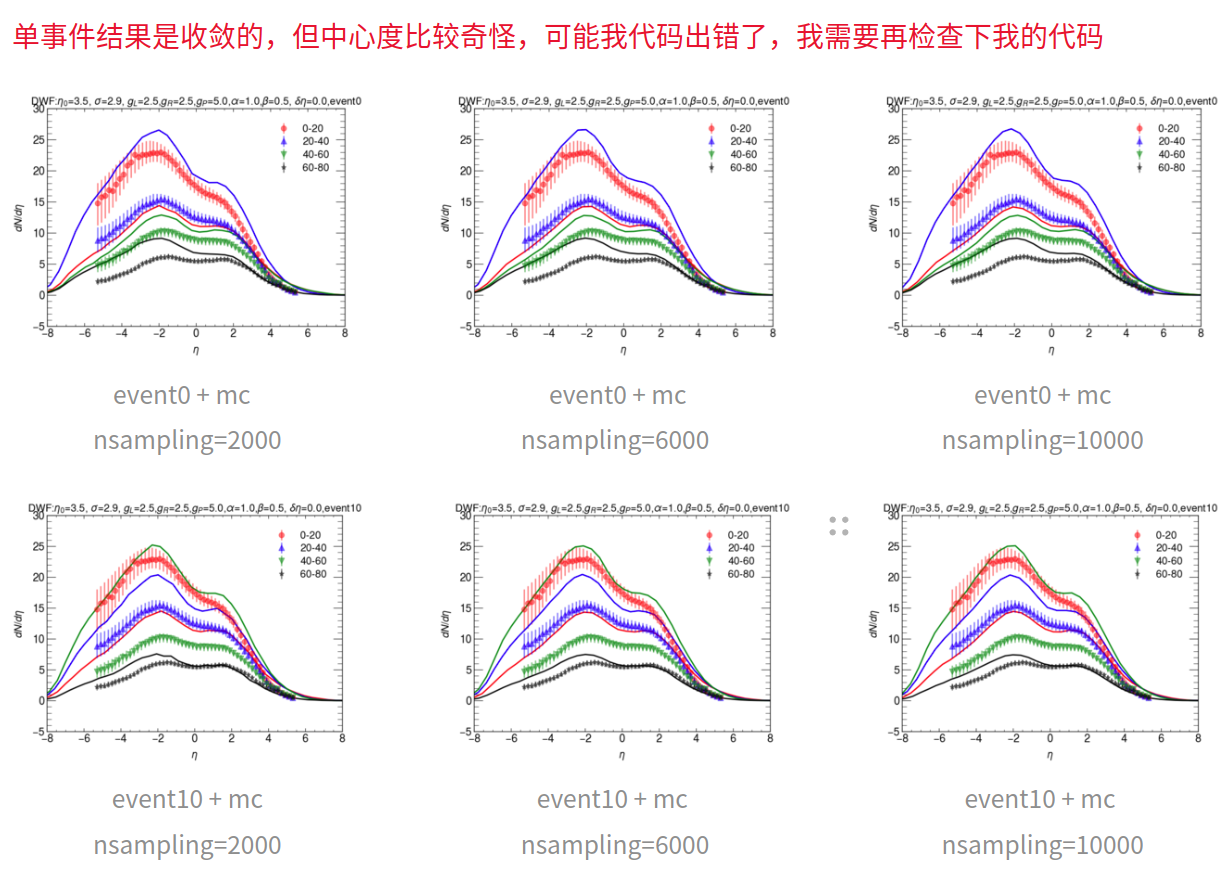

In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# from IPython.display import Image
import mplhep as hep
hep.style.use('ATLAS')
import os
# from tqdm import tqdm
# import h5py

In [2]:
# 导入实验结果
data_exp0_20 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_0_20.dat')
data_exp20_40 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_20_40.dat')
data_exp40_60 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_40_60.dat')
data_exp60_80 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_60_80.dat')
data_exp80_100 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_80_100.dat')

data_exp = np.array([data_exp0_20,data_exp20_40,data_exp40_60,data_exp60_80,data_exp80_100])


In [3]:
def convert_label(original_label):
    #3#
    #entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0
    #
    # 分割字符串
    parts = original_label.split('_')

    # 提取相关部分并转换格式
    eta_0 = (parts[2].replace('p', '.'))  # 第4部分是 eta_0 的值
    sigma = (parts[4].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    L_factor = (parts[7].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    R_factor = (parts[10].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    P_factor = (parts[13].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    alpha = (parts[15].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    beta = (parts[17].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    delta_eta = (parts[20].replace('p', '.'))  # 第6部分是 sigma 的值，并将 'p' 替换为 '.'
    

    
    # 格式化字符串
    formatted_label = (f'$\\rm \\eta_0$={eta_0}, $\\rm \\sigma$={sigma}, $\\rm g_L$={L_factor}, $\\rm g_R$={R_factor}, '
                 + f'$\\rm g_P$={P_factor}, $\\rm \\alpha$={alpha}, $\\rm \\beta$={beta}, $\\rm \\Delta \\eta$={delta_eta}')

    return formatted_label


In [10]:
def plot_dNdEta(m=0,n=20,eta_flat='1p0', eta_gw='1p3', event_range=[0,300],
                para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
                mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=16, HWF_or_DWF='HWF',color='blue'):
    titletext = convert_label(para)
    
    # 读取流体结果
    if mode_MC_SMOOTH == 'MC':
#         input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_mc_charged.dat"
        # 流体结果文件路径
        disk_2T = '74e6f585-9c67-40c0-a5e9-89fb98e77bab'
        input_dir = (f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/"
                               f"ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/")
        input_filename = "dNdEta_mc_charged.dat"
    elif mode_MC_SMOOTH == 'SMOOTH':
        input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_Charged.dat"

    # Loop through the files
    for i in range(event_range[0], event_range[1]):
        input_path = os.path.join(input_dir, f"event{i}", input_filename)
        dNdEta = np.loadtxt(input_path)
        plt.plot(dNdEta[:, 0], dNdEta[:, 1], color=color)
        
        plt.xlabel(r"$\rm \eta$", fontsize=fontsize,ha='center')
        plt.ylabel(r"$\rm dN/d\eta$", fontsize=fontsize,ha='center')
        plt.title(titletext, fontsize=fontsize)
        plt.xlim(-8, 8)
#         plt.legend()
#         plt.grid(True)
#         plt.show()
    

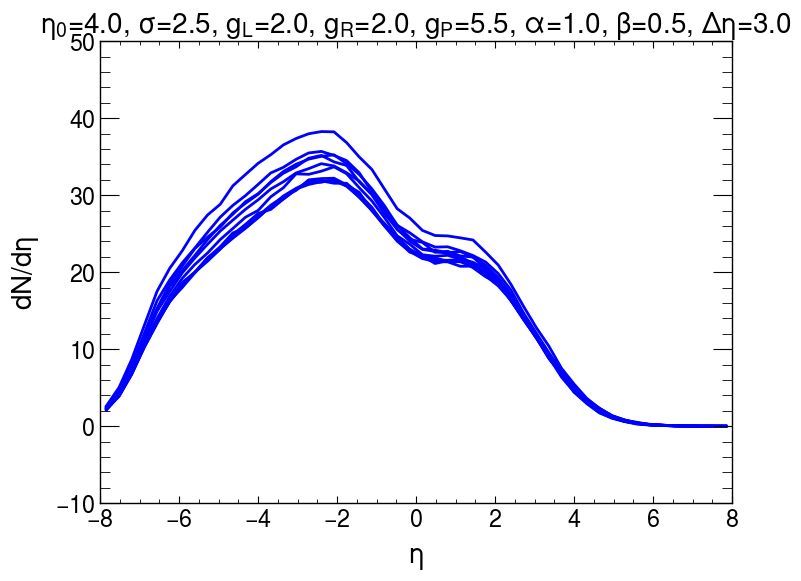

In [11]:
plot_dNdEta(m=0, n=20, eta_flat='1p3', eta_gw='1p3', event_range=[0,10],
            para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
            mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=20, HWF_or_DWF='DWF',color='blue')

In [12]:
# 绘图函数
def plot_dNdEta_multiple_centralities(eta_flat='1p3', eta_gw='1p3', event_range=[0, 100],
                                      para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
                                      mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=20, HWF_or_DWF='DWF'):
    titletext = convert_label(para)
    colors = ['blue', 'green',  'orange', 'red','purple']  # 为每个中心度指定颜色
    centralities = [(0, 20), (20, 40), (40, 60), (60, 80),(80,100)]
    
    plt.figure(figsize=(8, 6))
    
    for idx, (m, n) in enumerate(centralities):
        color = colors[idx % len(colors)]  # 循环选择颜色
        
        # 读取流体结果
        if mode_MC_SMOOTH == 'MC':
#             input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#             input_filename = "dNdEta_mc_charged.dat"
            # 流体结果文件路径
            disk_2T = '74e6f585-9c67-40c0-a5e9-89fb98e77bab'
            input_dir = (f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/"
                                   f"ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/")
            input_filename = "dNdEta_mc_charged.dat"
        elif mode_MC_SMOOTH == 'SMOOTH':
            input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
            input_filename = "dNdEta_Charged.dat"
        
        # 遍历事件范围，叠加绘制
        for i in range(event_range[0], event_range[1]):
            input_path = os.path.join(input_dir, f"event{i}", input_filename)
            try:
                dNdEta = np.loadtxt(input_path)
                plt.plot(dNdEta[:, 0], dNdEta[:, 1], color=color, alpha=0.3)  # 单个事件用透明度区分
            except Exception as e:
                print(f"文件 {input_path} 读取失败: {e}")
        
        # 添加中心度范围的图例
        plt.plot([], [], color=color, label=f"Centrality {m}-{n}%")  # 只为图例创建一个空线条
    
    plt.xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
    plt.ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')
    plt.title(titletext, fontsize=fontsize)
    plt.xlim(-8, 8)
    plt.legend(fontsize=fontsize - 2)
    plt.grid(True)
    plt.show()




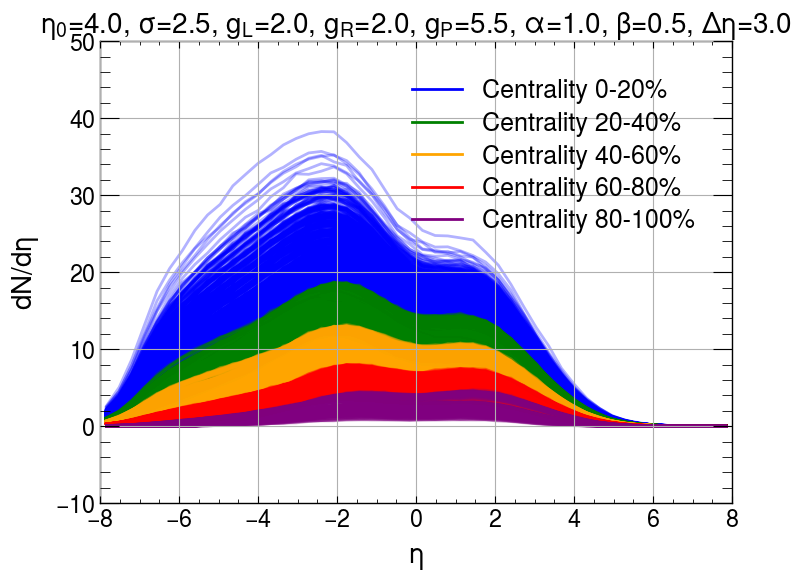

In [13]:
# 定义中心度范围并调用绘图函数
plot_dNdEta_multiple_centralities(eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                                  para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
                                  mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=20, HWF_or_DWF='DWF')

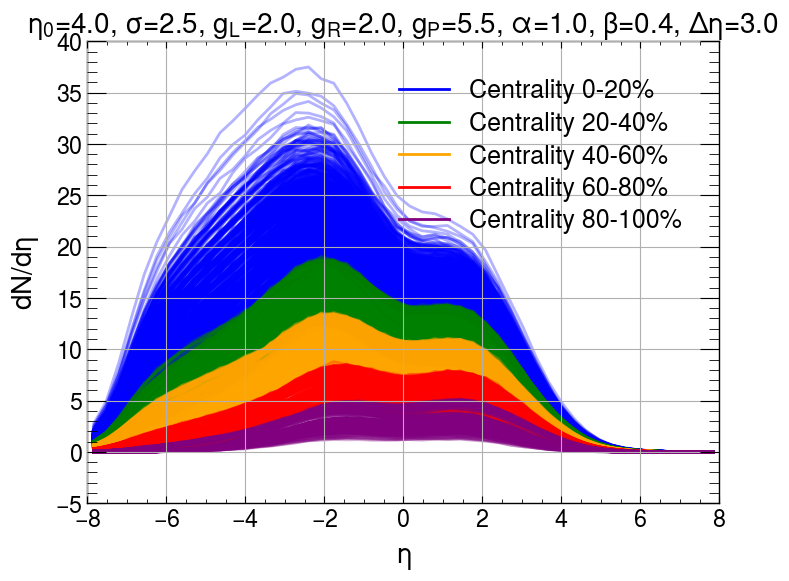

In [14]:
# 定义中心度范围并调用绘图函数
plot_dNdEta_multiple_centralities(eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                                  para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p4_y_loss_3p0",
                                  mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=20, HWF_or_DWF='DWF')

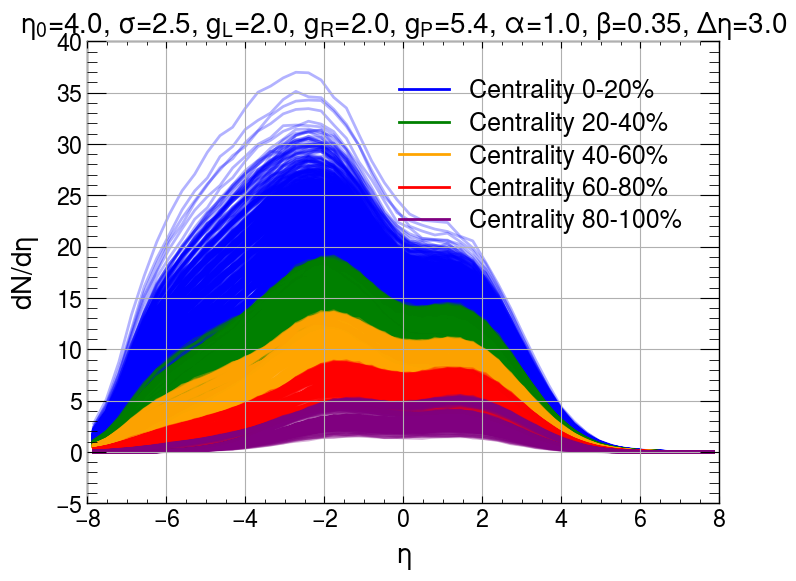

In [15]:
# 定义中心度范围并调用绘图函数
plot_dNdEta_multiple_centralities(eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                                  para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p4_alpha_1p0_beta_0p35_y_loss_3p0",
                                  mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=20, HWF_or_DWF='DWF')

In [59]:
def plot_dNdEta_multiple_subplots(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 100],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_0p7_R_factor_0p7_P_factor_6p5_alpha_2p0_beta_0p5_y_loss_0p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=12,
    HWF_or_DWF='DWF'):
    
    #设置图标标签等
    centrality_ranges=[[0, 20], [20, 40], [40, 60], [60, 80],[80,100]]
    # 颜色列表，用于每个中心度的线条和散点保持一致
    colors = ['red','blue', 'green', 'orange', 'purple','black', 'cyan']
    labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
    markers = ['o', '^', 'v', '*','s', 'D']

    num_centralities = len(centrality_ranges)
#     fig, axes = plt.subplots(1, num_centralities, figsize=(20, 5), sharey=True)
#     fig, axes = plt.subplots(1, num_centralities, figsize=(25, 5))
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()  # 将 2x4 的数组转换为 1D 数组，便于迭代


    
    titletext = convert_label(para)
    disk_2T='74e6f585-9c67-40c0-a5e9-89fb98e77bab'
    
    # 对中心度循环，
    for i, centrality in enumerate(centrality_ranges):
        m, n = centrality
        color = colors[i % len(colors)]  # 轮换颜色
        label = f"Centrality {m}-{n}%"
        ax = axes[i]
        ax.errorbar(data_exp[i][:, 0], data_exp[i][:, 2], yerr=[data_exp[i][:, 4], data_exp[i][:, 3]], 
                     fmt=markers[i], ecolor='black', color='black', label=labels[i])
        # 读取流体结果路径
        if mode_MC_SMOOTH == 'MC':
#             input_dir = f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#             input_filename = "dNdEta_mc_charged.dat"
            # 流体结果文件路径
            disk_2T = '74e6f585-9c67-40c0-a5e9-89fb98e77bab'
            input_dir = (f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/"
                                   f"ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/")
            input_filename = "dNdEta_mc_charged.dat"
        elif mode_MC_SMOOTH == 'SMOOTH':
            input_dir = f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
            input_filename = "dNdEta_Charged.dat"
        elif mode_MC_SMOOTH == 'MC4': #5.5 + 0.35 + n_{BC}
            input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result_n_BC/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
            input_filename = "dNdEta_mc_charged.dat"

        # 逐事件读取并绘图
        for j in range(event_range[0], event_range[1]):
            input_path = os.path.join(input_dir, f"event{j}", input_filename)
            if os.path.exists(input_path):
                dNdEta = np.loadtxt(input_path)
                ax.plot(dNdEta[:, 0], dNdEta[:, 1] * coef, color=color, alpha=0.5)
                

        # 子图设置
        ax.set_xlim(-8, 8)
        ax.set_ylim(0, 40)
        ax.set_xlabel(r"$\rm \eta$", fontsize=fontsize,ha='center')
        ax.set_title(label, fontsize=fontsize)
        ax.set_ylabel(r"$\rm dN/d\eta$", fontsize=fontsize,ha='center')
        
#         if i == 0:  # 只在第一个子图添加y轴标签
#             ax.set_ylabel("$dN/d\eta$", fontsize=fontsize,ha='center')
#         ax.grid(True)

    # 总体标题
    axes[-1].axis('off')
    fig.suptitle(titletext, fontsize=fontsize + 4)
    fig.tight_layout(rect=[0, 0, 1, 1])
    plt.show()




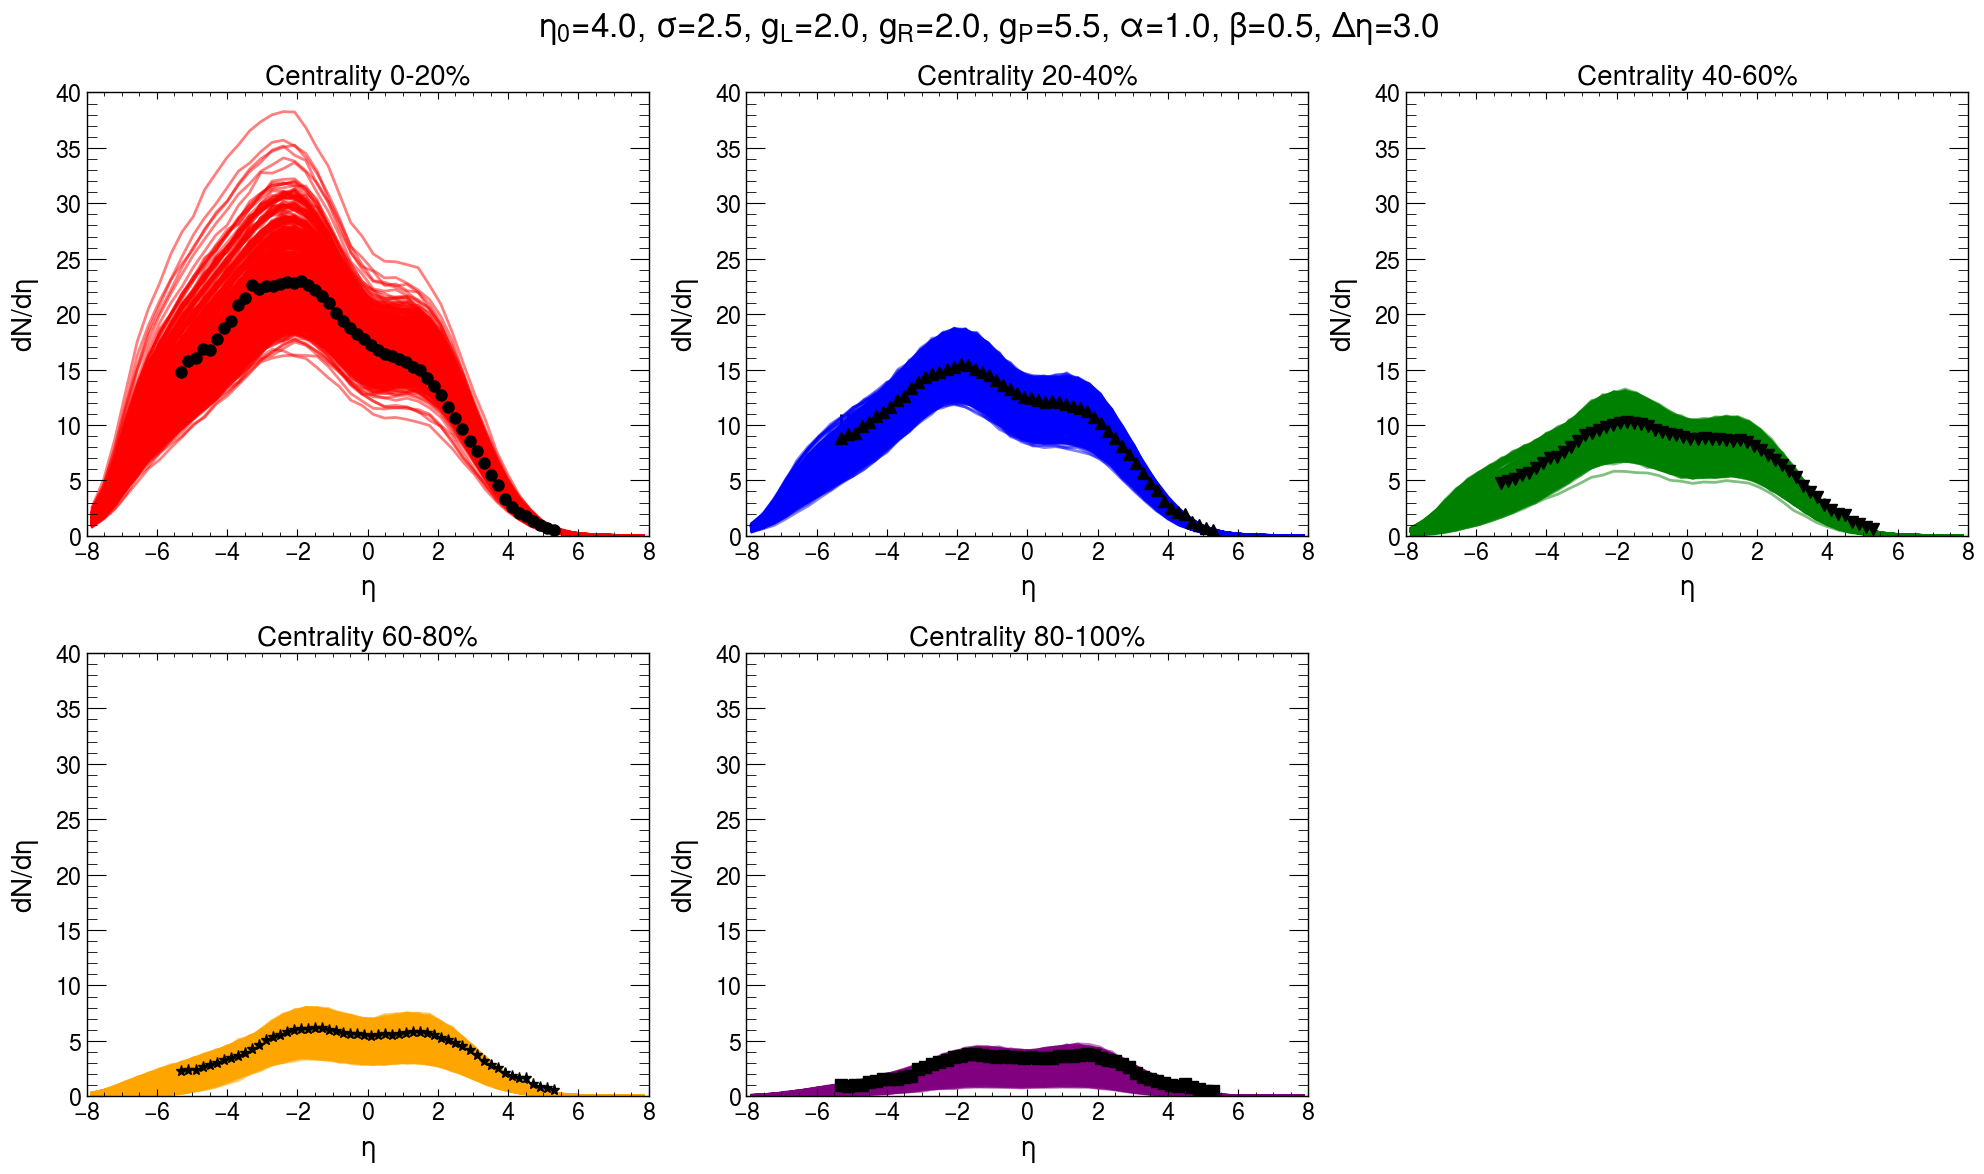

In [60]:
plot_dNdEta_multiple_subplots(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 1000],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=20,
    HWF_or_DWF='DWF'
)

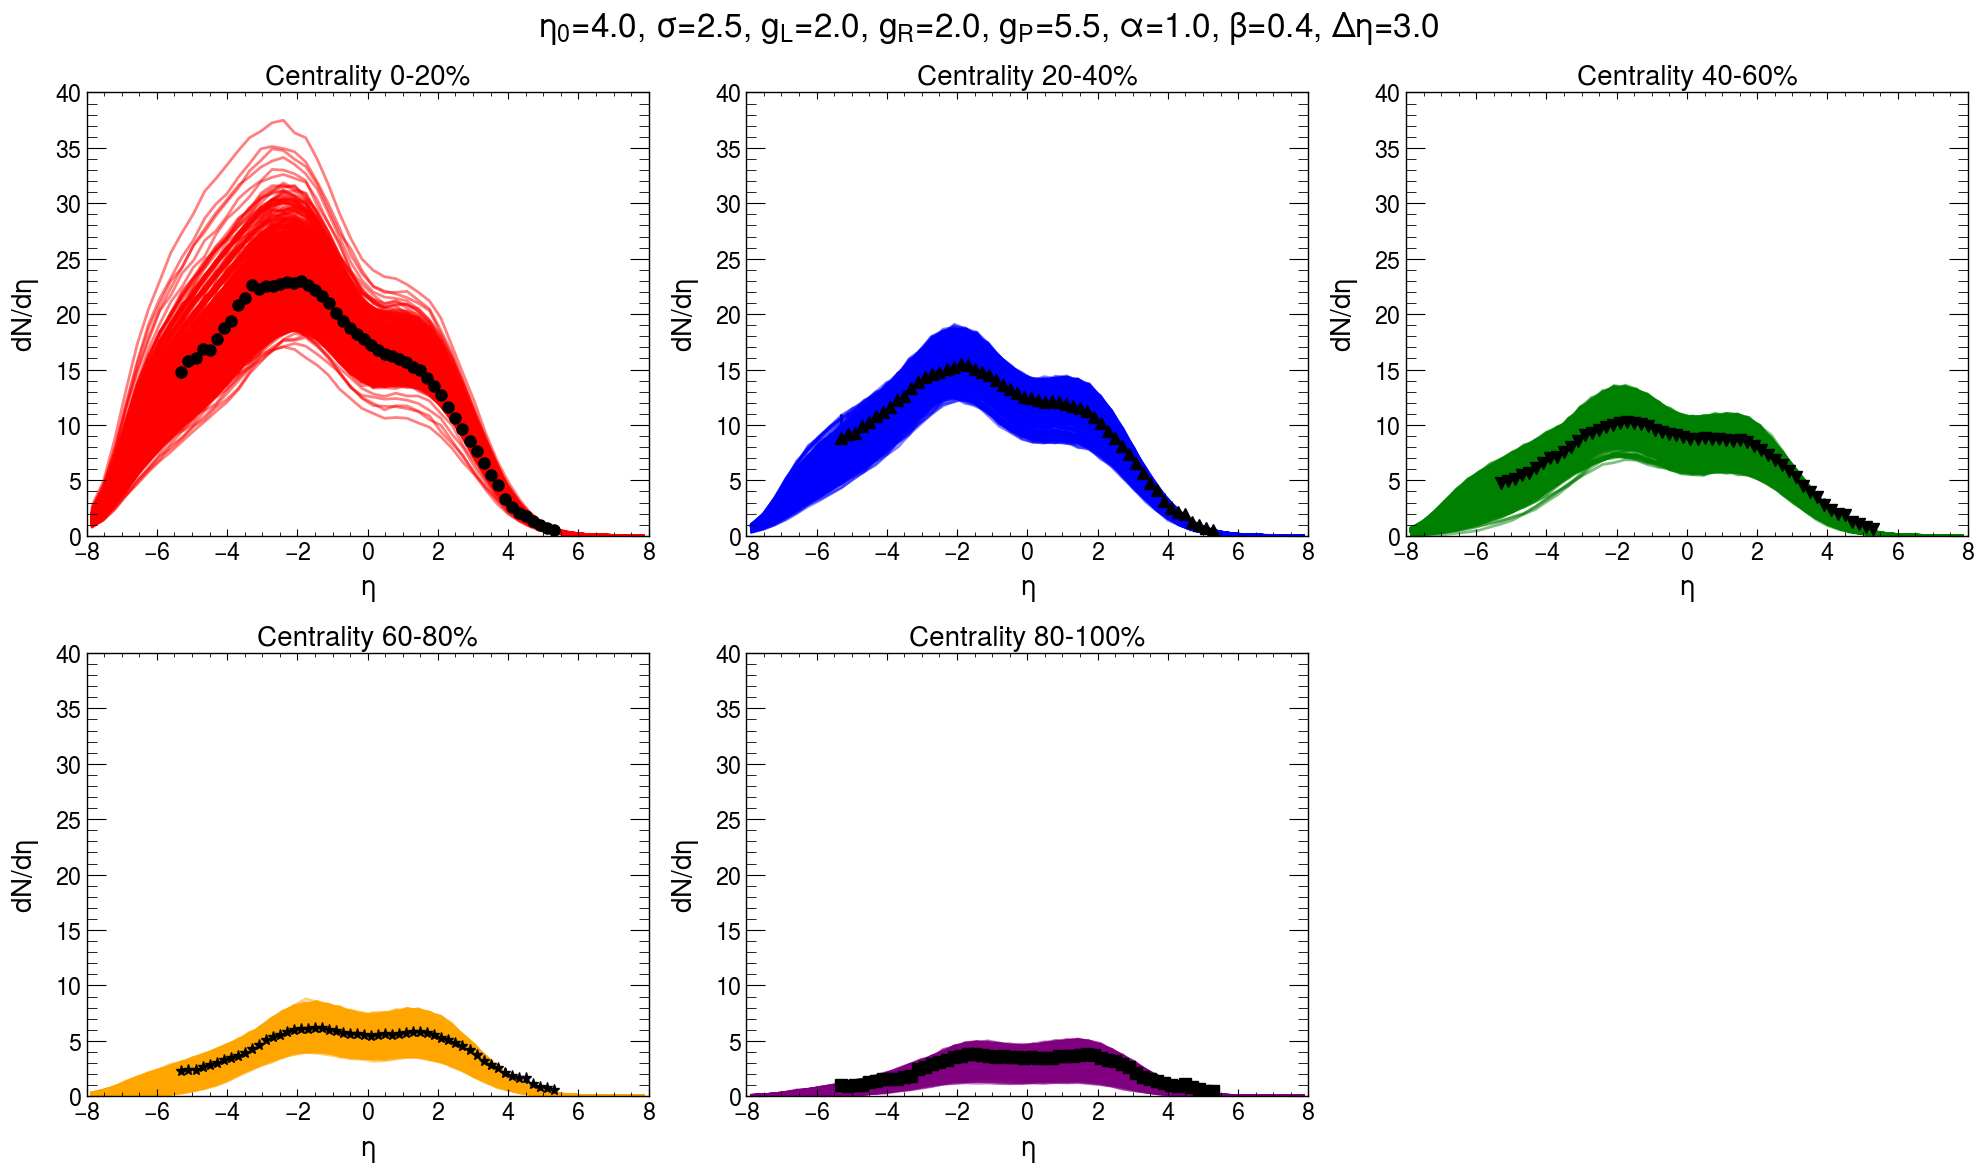

In [61]:
plot_dNdEta_multiple_subplots(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 1000],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p4_y_loss_3p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=20,
    HWF_or_DWF='DWF'
)

In [62]:
def plot_dNdEta_multiple_subplots2(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 100],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_0p7_R_factor_0p7_P_factor_6p5_alpha_2p0_beta_0p5_y_loss_0p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=12,
    HWF_or_DWF='DWF'):
    
    # 设置中心度范围和样式
    centrality_ranges = [[0, 20], [20, 40], [40, 60], [60, 80], [80, 100]]
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'cyan']
    centrality_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    markers = ['o', '^', 'v', '*', 's', 'D']

    # 创建图形
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    disk_2T = '74e6f585-9c67-40c0-a5e9-89fb98e77bab'
    
    # 对中心度循环
    for i, centrality in enumerate(centrality_ranges):
        m, n = centrality
        color = colors[i % len(colors)]
        ax = axes[i]
        
        # 绘制实验数据（显示图例）
        exp_plot = ax.errorbar(data_exp[i][:, 0], data_exp[i][:, 2], 
                             yerr=[data_exp[i][:, 4], data_exp[i][:, 3]], 
                             fmt=markers[i], ecolor='black', color='black',
                             label='PHOBOS')  # 显示实验数据图例

        # 读取流体结果路径
        if mode_MC_SMOOTH == 'MC':
            input_dir = (f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/"
                       f"ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/")
            input_filename = "dNdEta_mc_charged.dat"
        elif mode_MC_SMOOTH == 'SMOOTH':
            input_dir = f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
            input_filename = "dNdEta_Charged.dat"

        # 绘制流体结果（不显示图例）
        for j in range(event_range[0], event_range[1]):
            input_path = os.path.join(input_dir, f"event{j}", input_filename)
            if os.path.exists(input_path):
                dNdEta = np.loadtxt(input_path)
                ax.plot(dNdEta[:, 0], dNdEta[:, 1] * coef, color=color, alpha=0.5, label='_nolegend_')

        # 子图设置
        ax.set_xlim(-8, 8)
        ax.set_ylim(0, 40)
        ax.set_xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
        ax.set_ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')
        
        # 添加双图例（中心度和实验数据）
        centrality_legend = plt.Line2D([], [], color='black', marker='', linestyle='', label=centrality_labels[i])
        handles = [centrality_legend, exp_plot]
        
        ax.legend(handles=handles, 
                 loc='upper right', 
                 fontsize=fontsize,
                 frameon=False)

    # 第六个子图关闭
    axes[-1].axis('off')

    plt.tight_layout()
    plt.show()

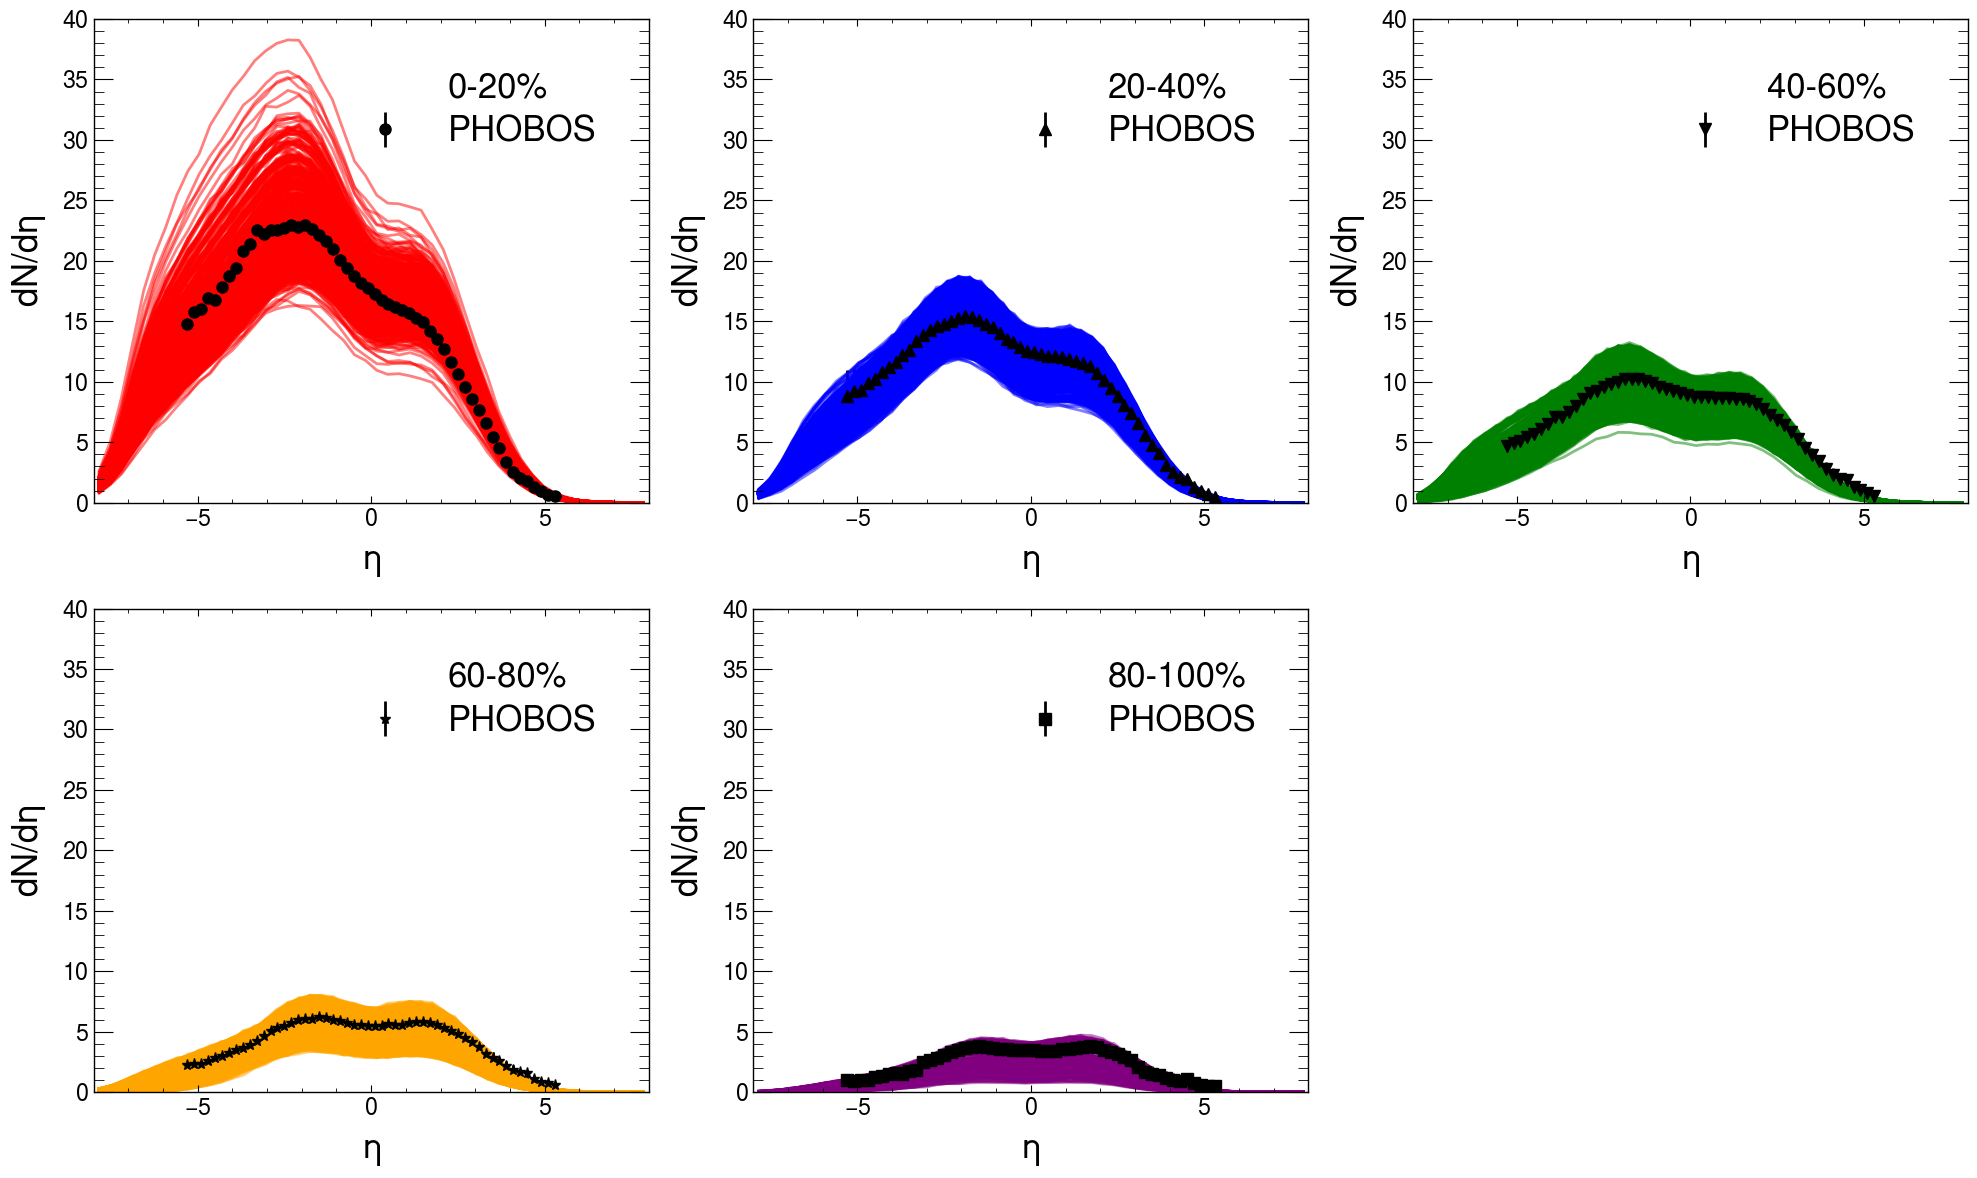

In [63]:
plot_dNdEta_multiple_subplots2(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 1000],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=25,
    HWF_or_DWF='DWF'
)

In [68]:
def plot_dNdEta_multiple_subplots3(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 100],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_0p7_R_factor_0p7_P_factor_6p5_alpha_2p0_beta_0p5_y_loss_0p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=12,
    HWF_or_DWF='DWF',
    save_fig=False):
    
    # 设置中心度范围和样式
    centrality_ranges = [[0, 20], [20, 40], [40, 60], [60, 80], [80, 100]]
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'cyan']
    centrality_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    markers = ['o', '^', 'v', '*', 's', 'D']

    # 创建图形
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    disk_2T = '74e6f585-9c67-40c0-a5e9-89fb98e77bab'
    
    # 对中心度循环
    for i, centrality in enumerate(centrality_ranges):
        m, n = centrality
        color = colors[i % len(colors)]
        ax = axes[i]
        
        # 绘制实验数据（显示图例）
        exp_plot = ax.errorbar(data_exp[i][:, 0], data_exp[i][:, 2], 
                             yerr=[data_exp[i][:, 4], data_exp[i][:, 3]], 
                             fmt=markers[i], ecolor='black', color='black',
                             label='PHOBOS')

        # 创建流体结果的图例句柄（使用对应颜色的实线）
        hydro_line = plt.Line2D([], [], color=color, linestyle='-', linewidth=2, label='Hydro')
        
        # 读取流体结果路径
        if mode_MC_SMOOTH == 'MC':
            input_dir = (f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/"
                       f"ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/")
            input_filename = "dNdEta_mc_charged.dat"
        elif mode_MC_SMOOTH == 'SMOOTH':
            input_dir = f"/media/mengzhu/{disk_2T}/home/mengzhu/d_Au_work_eta_determination/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
            input_filename = "dNdEta_Charged.dat"
        elif mode_MC_SMOOTH == 'MC4': #5.5 + 0.35 + n_{BC}
            input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result_n_BC/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
            input_filename = "dNdEta_mc_charged.dat"

        # 绘制流体结果（不单独显示图例）
        for j in range(event_range[0], event_range[1]):
            input_path = os.path.join(input_dir, f"event{j}", input_filename)
            if os.path.exists(input_path):
                dNdEta = np.loadtxt(input_path)
                ax.plot(dNdEta[:, 0], dNdEta[:, 1] * coef, color=color, alpha=0.5, label='_nolegend_')
        
        # 增大坐标轴刻度标签大小 (原始为默认大小，现设为18)
        axes[i].tick_params(axis='both', which='major', labelsize=fontsize)  # X和Y轴主刻度

        # 子图设置
        ax.set_xlim(-8, 8)
        ax.set_ylim(0, 45)
        ax.set_xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
        ax.set_ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')
        
        # 添加三图例（中心度、实验数据、流体结果）
        centrality_legend = plt.Line2D([], [], color='black', marker='', linestyle='', label=centrality_labels[i])
        handles = [centrality_legend, hydro_line, exp_plot]
        
        ax.legend(handles=handles, 
                 loc='upper right', 
                 fontsize=fontsize,
                 frameon=False)

    # 第六个子图关闭
    axes[-1].axis('off')
    plt.tight_layout()
    if save_fig:
        plt.savefig(f'fig/dNdeta_centralities_{mode_MC_SMOOTH}.pdf', bbox_inches='tight', pad_inches=0.0)
    plt.show()


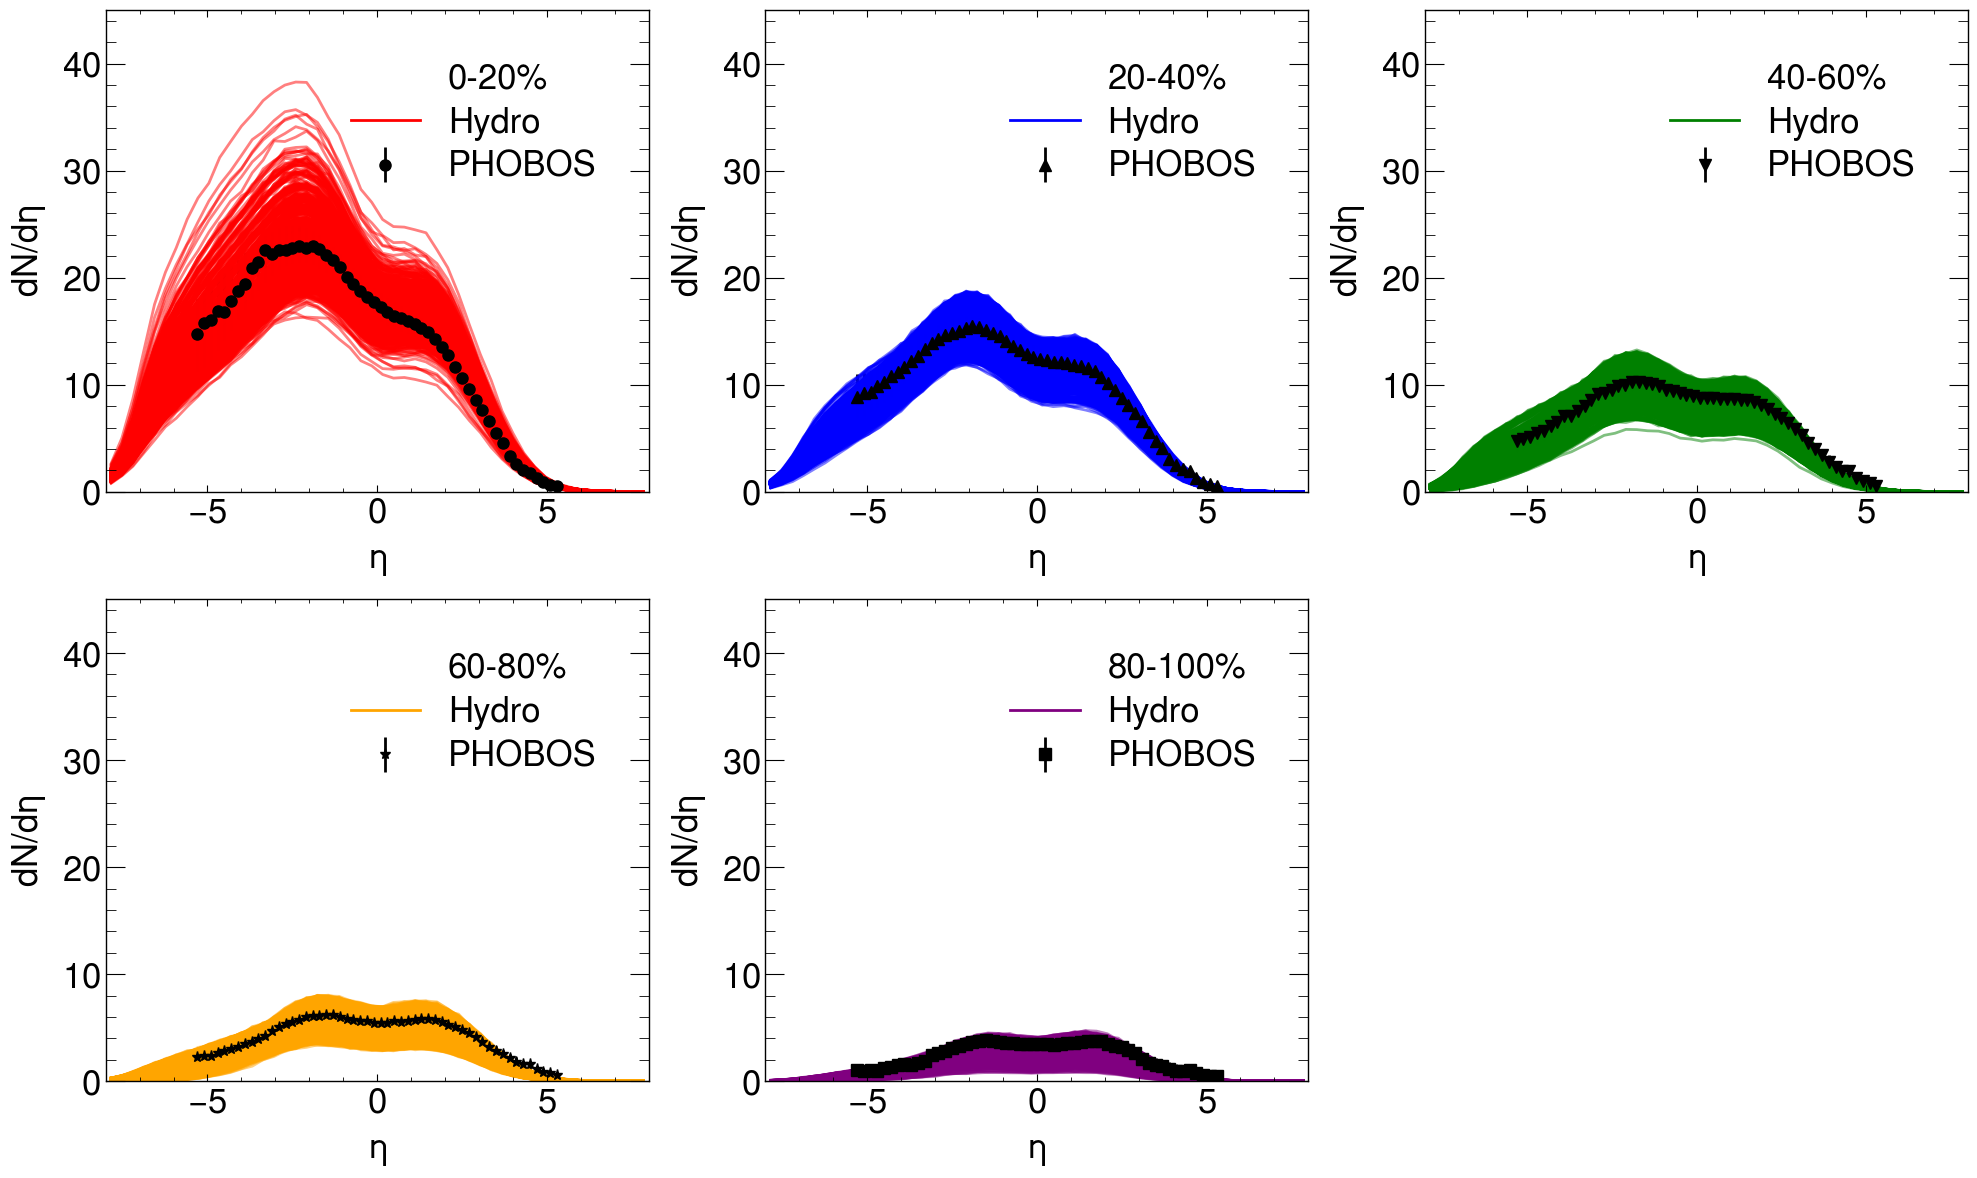

In [71]:
plot_dNdEta_multiple_subplots3(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 1000],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
    mode_MC_SMOOTH="MC",
    nsampling=2000,
    coef=1,
    fontsize=25,
    HWF_or_DWF='DWF',
    save_fig=True
)

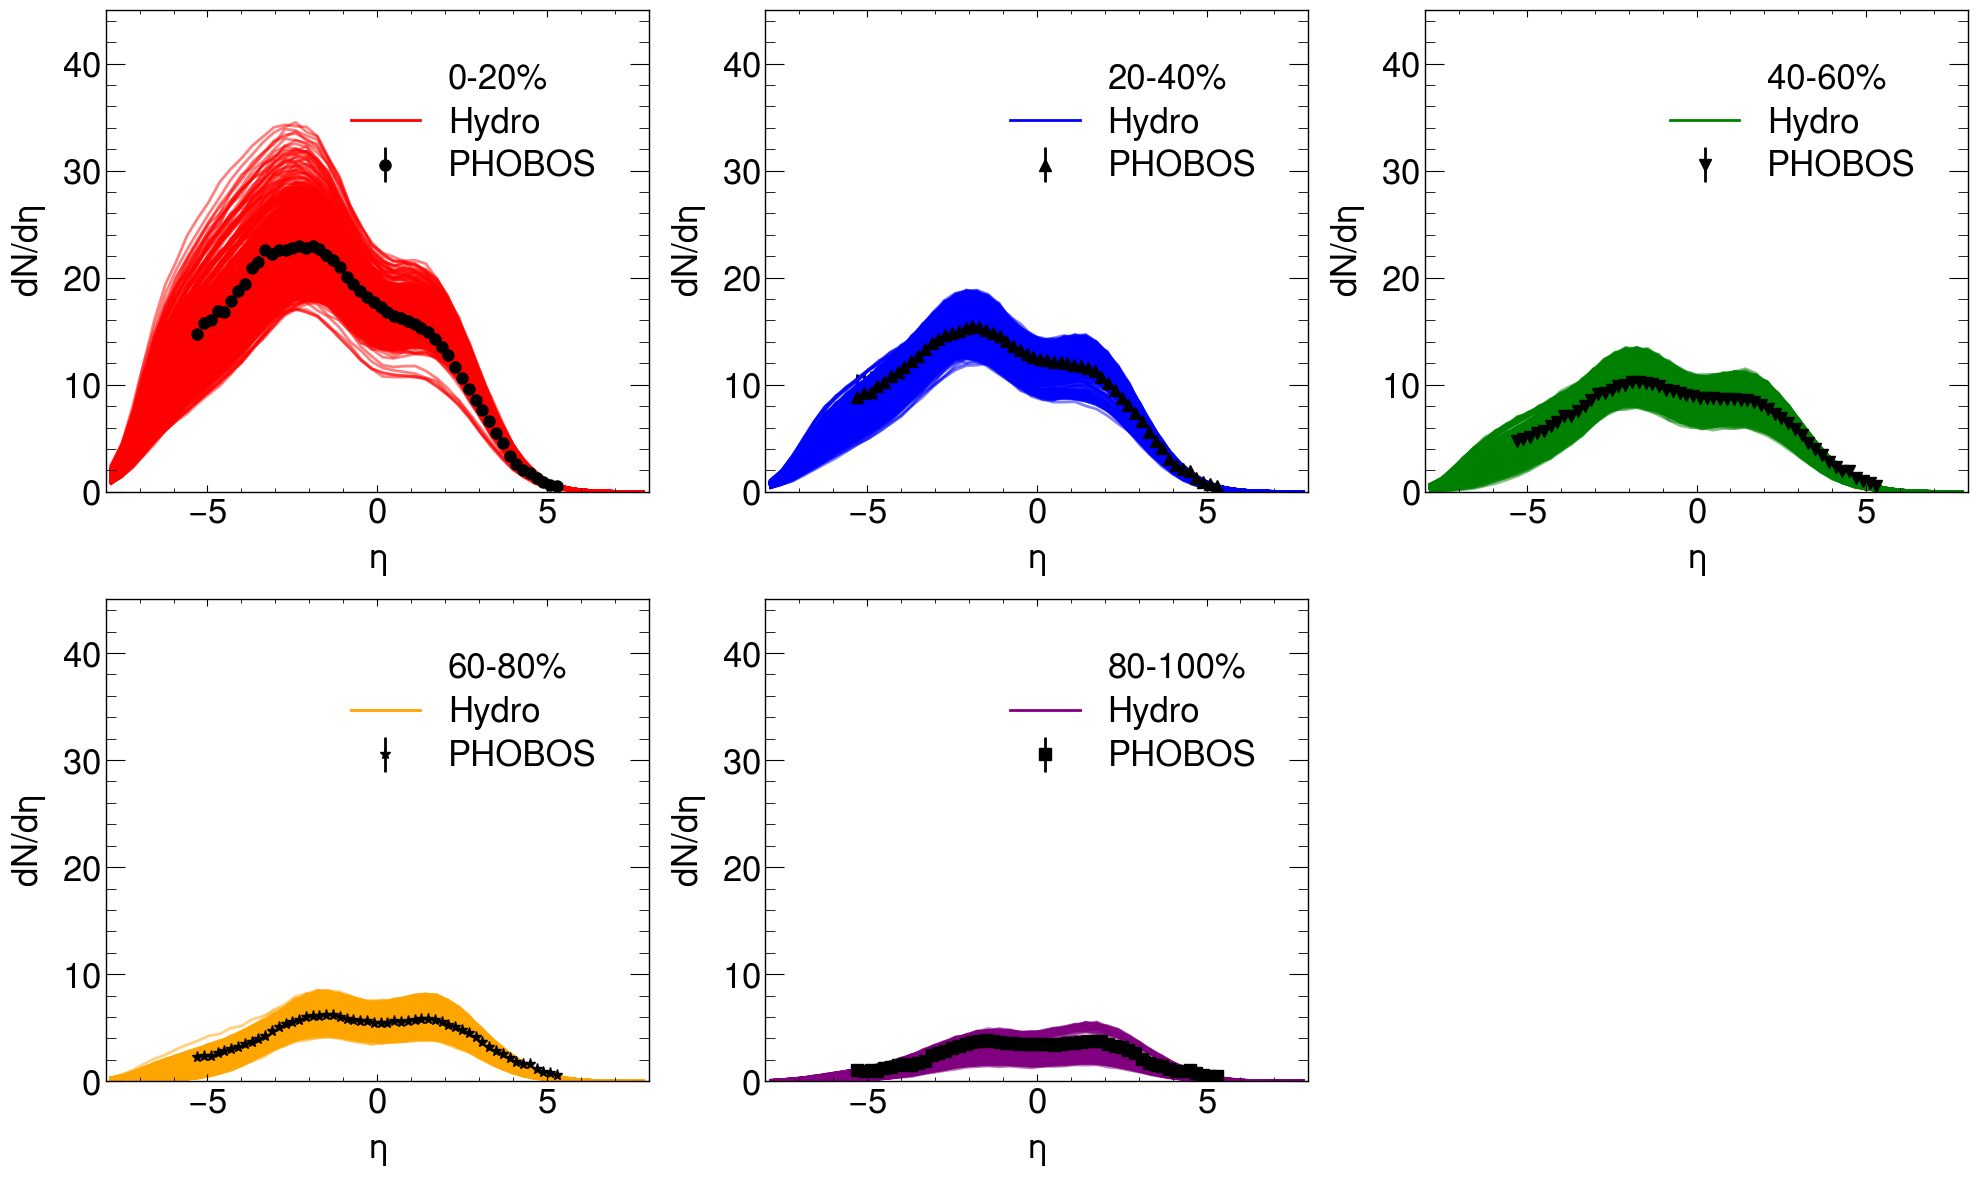

In [72]:
plot_dNdEta_multiple_subplots3(
    eta_flat='1p3',
    eta_gw='1p3',
    event_range=[0, 1000],
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    mode_MC_SMOOTH="MC4",
    nsampling=2000,
    coef=1,
    fontsize=25,
    HWF_or_DWF='DWF',
    save_fig=True
)